#Team 8
Παραλίκας Ηλίας 0316605

Καφουρος Αλεξανδρος 03116741

Φαρδέλας Ιωάννης  03113190

#Imports

In [210]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install -U gensim

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader
import joblib
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

nltk.download('wordnet') 
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt')



from google.colab import drive
drive.mount('/content/drive')


#Καθώς αποθηκεύουμε μεγάλες μεταβλητές το drive, δεν θελουμε να τρέχουμε συνέχεια τον κώδικα που τις παράγει
first_run=False

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Create Personal Dataset

In [2]:
dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 8

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

In [3]:
initial_vectorizer = TfidfVectorizer()
initial_vectorizer.fit(corpus)
corpus_tf_idf_plain = initial_vectorizer.transform(corpus)

len(initial_vectorizer.vocabulary_)

48987

#Content Recommender

In [8]:
from scipy.sparse.csr import csr_matrix

def content_recommender(target_movie,corpus_type,max_recommendations=5,verbose=0):
   if verbose>0:
    print("**********************Target Movie Details**********************")
    print("ID: ",target_movie)
    print("Title: ",titles[target_movie])
    print("Categories: ",categories[target_movie])
    print("Summary: ",corpus[target_movie])

    # when used with tfidf the corpus will be of type csr_matrix
    if type(corpus_type) is csr_matrix:
        cos_sims = np.concatenate(cosine_similarity(corpus_type,  corpus_type[target_movie]))
    # when used with embedings the corpus will be of type list
    if type(corpus_type) is list:
        cos_sims = np.concatenate(cosine_similarity(corpus_type,  [corpus_type[target_movie]]))
  
    rankings =  np.argsort(cos_sims)
    rankings = rankings[-(max_recommendations+1):-1]


    if verbose>1:
      for rank in rankings[::-1]:
        print("\n************************Recommendation : ",rank," ************************")
        print('ID : ',rank)
        print('Title : ',titles[rank])
        print('Cossine similarity : ',cos_sims[rank])
        print('Categories : ' ,categories[rank])
        if verbose >2:
          print("Summary: ",corpus[rank])

    return rankings

In [ ]:
content_recommender(342,corpus_tf_idf_plain,2,verbose=3)

**********************Target Movie Details**********************
ID:  342
Title:  ['Daman: A Victim of Marital Violence']
Categories:  ['"Drama",  "Art film",  "World cinema"']
Summary:  Set in the backdrop of Assam, a state in the north eastern part of India, the film portrays the conservative pan Indian socio cultural life where the women are subject to domestic violence. The Saikia family are extremely wealthy. The two sons of the family are Sanjay  and Sunil Saikia . The latter being the kinder of the two whilst the former is very hot-tempered and has occasional mood swings. The parents decide to get him married to Durga , a lower caste girl from a poor family, thinking she will be able to cope with Sanjay's temper. Sanjay initially refuses to marry Durga, but when his mother threatens to cut him off from the family will he relents. Thus, Durga marries Sanjay and looks forward to her new life. From day one, Durga is subjected to physical and mental harm by her husband. To add insul

array([ 806, 4924])

Βλέπουμε ότι όλες οι ταινίες είναι ρομαντικές ταινίες, που εξελίσονται στην Ινδία. Μάλιστα, τυχαίνει οι πρωταγωνίστριες να έχουν όλες το ίδιο όνομα, Durga. 

In [9]:
content_recommender(1923,corpus_tf_idf_plain,2,verbose=3)

**********************Target Movie Details**********************
ID:  1923
Title:  ['Up the Creek']
Categories:  ['"Action/Adventure",  "Action",  "Comedy",  "Adventure",  "Indie"']
Summary:  Bob McGraw, Max, Gonzer, and Irwin, students at Lepetomane University , are volunteered to compete in a collegiate raft race. They are "recruited" by Dean Burch who uses records of McGraw's checkered past as a means of blackmail to get them to compete. "You're not AT the bottom of the list. You ARE the bottom of the list!", says Burch. He even offers them degrees in the major of their choice as additional incentive. They're up against Ivy University, prep schoolers who, with the help of an Ivy alumnus named Dr. Roland Tozer, plan to cheat their way to the Winner's Circle. Their adversaries also include the Washington Military Institute, disqualified for their attempts to sabotage the other schools rafts. Captain Braverman, the leader of the Military men, has it in for McGraw because he personally 

array([3931, 1699])

Βλέπουμε ότι υπάρχει μικρότερη σχέση μεταξύ των ταινιών. Η πρώτη είναι πιο ελαφριά, ενώ οι άλλες δύο πιό σκοτεινές. Παρόλλα αυτά, όλες οι ταινίες έχουν σχέση με blackmail, sabotage,  και άλλους τρόπους βρώμικου παιχνιδιού.

In [10]:
content_recommender(0,corpus_tf_idf_plain,2,verbose=3)

**********************Target Movie Details**********************
ID:  0
Title:  ['Camp Blood']
Categories:  ['"B-movie",  "Horror Comedy",  "Horror",  "Slasher",  "Indie"']
Summary:  A guide and a tourist are birdwatching in the shades of Camp Blackwood and begin to have sex. Suddenly, a man in a clown mask appears and brutally murders them. The story then focuses on four campers, who are planning a trip to Camp Blackwood. On the way, they meet the madcap Bromley Thatcher. After a brief exchange that includes a warning from Thatcher - "I'm not talking about a ghost here boy, I'm talking about a man, a REAL man, and he's in those woods!" - the group head into Camp Blackwood, now known to the audience as 'Camp Blood'. In the woods, they meet their guide, a butch lesbian known as 'Harris'. After spending the day doing menial tasks such as collecting firewood and setting up camp, the group settle down into their respective tents to enjoy a session of late-night love making. The group awake

array([ 383, 1796])

Αρκετά καλή νοηματική συνέχεια, με μόνο ταινίες τρόμου να προτείνονται. 

#Documents Processing 

In [11]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation )
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

In [12]:

def remove_punctuation(document,stem=False,lem=False):
    if lem and stem:
      print('WARNIGN you have activated both lem and stem!')
    # βγάζουμε κάποιους χαρατκήρες που είδαμε σε διάφορα κείμενα
    our_stopwords = ['\'s','\'t','\`s','\`t','\'m',':','\'','ndash','mdash','minus','sect','quot','nbsp', '-']


    words = nltk.word_tokenize(document.lower())
    # βγάζουμε stop words punctuation
    filtered_words = [word for word in words if word not in   (stopwords.words('english')+ list(string.punctuation)+our_stopwords)]
    filtered_words = thorough_filter(filtered_words)
    if lem:
      wordnet_lemmatizer = WordNetLemmatizer()
      words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
    elif stem :
      porter_stemmer = PorterStemmer()
      words = [porter_stemmer.stem(word) for word in filtered_words]
    else :
      words= filtered_words

    newDocument = " ".join(words)
    newDocument = newDocument.replace("'", "")
    newDocument = newDocument.replace('"', " ")

    newDocument = newDocument.encode("ascii", "ignore")
    newDocument = newDocument.decode()

    return newDocument

In [212]:
# τα έχουμε αποθηκεύσει για να μην χρειάζεται να τα τρέχουμε κάθε φορά.
if first_run:
  options = ['vanilla','stem','lem']

  for option in options:
    folder_name = 'drive/MyDrive/NEURAL/second/corpuses/'

    file_name = folder_name+ option+'_documents.pkl'

    if option == 'vanilla':
      documents = [remove_punctuation(doc) for doc in corpus]
    # δεν θα το βάλουμε στο word 2 vec
    if option == 'stem':
      documents = [remove_punctuation(doc,stem=True) for doc in corpus]

    if option == 'lem':
      documents = [remove_punctuation(doc,lem=True) for doc in corpus]


    joblib.dump(documents, file_name) 

In [13]:
file_name = 'drive/MyDrive/NEURAL/second/corpuses/'
vanilla_documents = joblib.load(file_name + 'vanilla_documents.pkl')
stem_documents = joblib.load(file_name + 'stem_documents.pkl')
lem_documents = joblib.load(file_name + 'lem_documents.pkl')

##Compare functions

##Get removed words

In [38]:
def get_removed_words(first_vectorizer,second_vectorizer): 
  removed_words =[]
  for word in first_vectorizer.vocabulary_:
    if (word not in second_vectorizer.vocabulary_):
      removed_words.append(word)
  return removed_words


###max df

Συναρτήσεις για να βλέπουμε ποιές λέξεις βγάζει το mix max df. Είναι κυρίως για δική μας χρήση και κατανόηση του πως δουλέυουν. 

In [39]:
def compare_max_dfs(high,low,corpus):
  high_vectorizer = TfidfVectorizer(max_df=high)
  high_vectorizer.fit(corpus)

  low_vectorizer = TfidfVectorizer(max_df=low)
  low_vectorizer.fit(corpus)

  print("High vectorizer words: ", len(high_vectorizer.vocabulary_) )
  print("Low vectorizer  words: ", len(low_vectorizer.vocabulary_))

  print("Difference in words: ", len(high_vectorizer.vocabulary_) - len(low_vectorizer.vocabulary_))
  print(get_removed_words(high_vectorizer,low_vectorizer))

In [40]:
compare_max_dfs(1.0,0.5,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  49220
Difference in words:  0
[]


δεν βγάζει τίποτα

In [41]:
compare_max_dfs(1.0,0.2,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  49190
Difference in words:  30
['man', 'way', 'day', 'love', 'find', 'away', 'back', 'film', 'life', 'time', 'two', 'go', 'help', 'get', 'tells', 'however', 'finds', 'tries', 'also', 'takes', 'later', 'goes', 'father', 'home', 'one', 'family', 'take', 'first', 'new', 'young']


αφαιρεί ελάχιστες λέξεις, απότ ις οποίες κάποιες θα μπορούσαν να θεωρηθούν χρήσιμες. π.χ. "love", "family"

In [42]:
compare_max_dfs(1.0,0.1,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  49085
Difference in words:  135
['man', 'story', 'way', 'meet', 'group', 'head', 'day', 'night', 'love', 'find', 'around', 'run', 'away', 'escape', 'runs', 'meets', 'attempts', 'death', 'car', 'back', 'room', 'film', 'life', 'year', 'time', 'two', 'friends', 'house', 'reveals', 'mother', 'school', 'return', 'three', 'next', 'local', 'small', 'money', 'go', 'police', 'brother', 'leaves', 'help', 'leaving', 'gives', 'asks', 'friend', 'get', 'fight', 'job', 'becomes', 'falls', 'begins', 'tells', 'nt', 'however', 'well', 'finds', 'trying', 'tries', 'finally', 'also', 'killed', 'kill', 'son', 'takes', 'wife', 'later', 'dead', 'long', 'town', 'another', 'goes', 'leave', 'men', 'still', 'father', 'starts', 'people', 'returns', 'sees', 'wants', 'order', 'city', 'together', 'last', 'left', 'home', 'one', 'come', 'arrives', 'family', 'world', 'decides', 'take', 'soon', 'named', 'along', 'years', 'going', 'end', 'never', 'even', 'must', 'first

Αντίστοιχα με τα παραπάνω , με λέξεις όπως "death", "car" , "school" , "police", "money", "killed", "kill", "dead" να έχουν μεγάλη εννοιολογική σημασία, κυρίως για ταινίες δράσης, αστυνομικές και ίσως θρίλερ

###mid df

In [32]:
def compare_min_dfs(high,low, corpus):
  high_vectorizer = TfidfVectorizer(min_df=high)
  high_vectorizer.fit(corpus)

  low_vectorizer = TfidfVectorizer(min_df=low)
  low_vectorizer.fit(corpus)


  print("High vectorizer words: ", len(high_vectorizer.vocabulary_) )
  print("Low vectorizer  words: ", len(low_vectorizer.vocabulary_))

  print("Difference in words: ", len(high_vectorizer.vocabulary_) - len(low_vectorizer.vocabulary_))
  print(get_removed_words(high_vectorizer,low_vectorizer))

In [33]:
compare_min_dfs(1,100,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  1165
Difference in words:  48055
['guide', 'tourist', 'birdwatching', 'shades', 'blackwood', 'clown', 'mask', 'brutally', 'focuses', 'campers', 'madcap', 'bromley', 'thatcher', 'brief', 'includes', 'warning', 'ghost', 'woods', 'butch', 'lesbian', 'harris', 'spending', 'menial', 'tasks', 'collecting', 'firewood', 'settle', 'respective', 'tents', 'enjoy', 'session', 'awake', 'burnt', 'carcass', 'campfire', 'majority', 'revolves', 'chasing', 'murdering', 'tricia', 'murderous', 'deceased', 'automobile', 'hindering', 'ensuing', 'melee', 'hacks', 'machete', 'safely', 'seat', 'strangles', 'unconsciousness', 'regains', 'consciousness', 'asylum', 'injection', 'doctors', 'depart', 'hallucinates', 'entering', 'novels', 'blinded', 'pilot', 'cmdr', 'harry', 'burns', 'michener', 'forgotten', 'heroes', 'korea', 'details', 'aboard', 'aircraft', 'carrier', 'uss', 'oriskany', 'factually', 'depicted', 'thayer', 'navy', 'f9f', 'panther', 'landing', 'te

βγάζει τα πάντα

In [34]:
compare_min_dfs(1,20,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  5065
Difference in words:  44155
['tourist', 'birdwatching', 'shades', 'blackwood', 'campers', 'madcap', 'bromley', 'thatcher', 'butch', 'lesbian', 'menial', 'tasks', 'firewood', 'tents', 'carcass', 'campfire', 'tricia', 'automobile', 'hindering', 'hacks', 'machete', 'strangles', 'unconsciousness', 'injection', 'hallucinates', 'novels', 'cmdr', 'michener', 'uss', 'oriskany', 'factually', 'thayer', 'f9f', 'panther', 'dignan', 'anthony', 'voluntary', 'exhaustion', '75', 'heists', 'landscaper', 'specific', 'critiquing', 'earrings', 'specified', 'mapplethorpe', 'bookstore', 'bickers', 'describe', 'intricate', 'lam', 'ins', 'spark', 'crop', 'envelope', 'hugs', 'alfa', 'romeo', 'narrating', 'caan', 'storage', 'tutoring', 'mapplethorpes', 'compliments', 'rekindle', 'landscaping', 'conducts', 'loads', 'furniture', 'rattling', 'joking', 'nuthouse', 'stevens', 'despises', 'fairness', 'generosity', '1944', 'baldwin', 'airfield', 'strategic', '

In [35]:
compare_min_dfs(1,20,stem_documents)

High vectorizer words:  36051
Low vectorizer  words:  3939
Difference in words:  32112
['birdwatch', 'shade', 'blackwood', 'camper', 'madcap', 'bromley', 'thatcher', 'butch', 'lesbian', 'menial', 'firewood', 'carcass', 'campfir', 'tricia', 'automobil', 'hinder', 'hack', 'machet', 'cmdr', 'michen', 'uss', 'oriskani', 'factual', 'thayer', 'f9f', 'panther', 'dignan', 'anthoni', 'voluntari', '75', 'critiqu', 'specifi', 'mapplethorp', 'bookstor', 'intric', 'lam', 'alfa', 'romeo', 'caan', 'storag', 'compliment', 'furnitur', 'rattl', 'nuthous', 'generos', '1944', 'baldwin', 'airfield', 'strateg', 'loomi', 'inexperi', 'conscript', 'michaelson', 'collin', 'demolit', 'li', 'munit', 'kwan', 'mei', 'pace', 'cavali', 'surplu', 'trampl', 'starv', 'resolut', 'outpost', 'reconcili', 'diverg', 'retribut', 'fundament', 'jonah', 'hex', 'confeder', 'cavalryman', 'quentin', 'turnbul', 'jeb', 'burk', 'psychopath', 'qt', 'thirst', 'mystic', 'fresher', 'quicker', 'instantan', 'revert', 'hunger', 'bounti', '18

In [36]:
compare_min_dfs(1,20,lem_documents)

High vectorizer words:  44661
Low vectorizer  words:  4669
Difference in words:  39992
['birdwatching', 'shade', 'blackwood', 'camper', 'madcap', 'bromley', 'thatcher', 'butch', 'lesbian', 'menial', 'firewood', 'carcass', 'campfire', 'tricia', 'automobile', 'hindering', 'hack', 'machete', 'strangles', 'unconsciousness', 'injection', 'doctors', 'hallucinates', 'cmdr', 'michener', 'oriskany', 'factually', 'thayer', 'f9f', 'panther', 'dignan', 'anthony', 'voluntary', 'exhaustion', '75', 'landscaper', 'critiquing', 'earring', 'specified', 'mapplethorpe', 'bookstore', 'bicker', 'describe', 'intricate', 'lam', 'ins', 'envelope', 'alfa', 'romeo', 'narrating', 'caan', 'storage', 'tutoring', 'mapplethorpes', 'compliment', 'rekindle', 'landscaping', 'furniture', 'rattling', 'joking', 'nuthouse', 'stevens', 'despises', 'fairness', 'generosity', '1944', 'baldwin', 'airfield', 'strategic', 'loomis', 'inexperience', 'conscript', 'michaelson', 'collins', 'demolition', 'translator', 'li', 'munition', 

Βλέπουμε ότι κόβει πάρα πολλές λέξεις

In [37]:
compare_min_dfs(1,15,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  6309
Difference in words:  42911
['birdwatching', 'shades', 'blackwood', 'campers', 'madcap', 'bromley', 'thatcher', 'butch', 'lesbian', 'menial', 'firewood', 'tents', 'carcass', 'campfire', 'tricia', 'hindering', 'hacks', 'machete', 'unconsciousness', 'injection', 'hallucinates', 'novels', 'cmdr', 'michener', 'uss', 'oriskany', 'factually', 'thayer', 'f9f', 'dignan', 'voluntary', '75', 'heists', 'landscaper', 'critiquing', 'earrings', 'specified', 'mapplethorpe', 'bookstore', 'bickers', 'intricate', 'lam', 'ins', 'spark', 'alfa', 'narrating', 'caan', 'tutoring', 'mapplethorpes', 'compliments', 'rekindle', 'landscaping', 'conducts', 'rattling', 'joking', 'nuthouse', 'stevens', 'despises', 'fairness', 'generosity', 'baldwin', 'airfield', 'strategic', 'bridges', 'loomis', 'inexperience', 'conscripts', 'michaelson', 'demolition', 'translator', 'munitions', 'kwan', 'mei', 'pace', 'cavalier', 'surplus', 'trampled', 'starving', 'resolute'

Με μία πρώτη ματιά βλέποτμε ότι λέξεις όπως "thatcher", "lesbian", αλλά θεωρούμε ότι η μείωση της διαστατικότητας θα βοηθήσει περισσότερο από  ότι θα βλάψει.

In [44]:
compare_min_dfs(1,10,vanilla_documents)

High vectorizer words:  49220
Low vectorizer  words:  8423
Difference in words:  40797
['birdwatching', 'shades', 'blackwood', 'campers', 'madcap', 'bromley', 'thatcher', 'menial', 'firewood', 'tents', 'carcass', 'campfire', 'tricia', 'hindering', 'hacks', 'unconsciousness', 'hallucinates', 'cmdr', 'michener', 'uss', 'oriskany', 'factually', 'thayer', 'f9f', 'dignan', 'voluntary', '75', 'heists', 'landscaper', 'critiquing', 'earrings', 'specified', 'mapplethorpe', 'bookstore', 'bickers', 'intricate', 'lam', 'ins', 'alfa', 'caan', 'tutoring', 'mapplethorpes', 'landscaping', 'rattling', 'joking', 'nuthouse', 'fairness', 'generosity', 'baldwin', 'airfield', 'bridges', 'inexperience', 'conscripts', 'michaelson', 'munitions', 'kwan', 'mei', 'pace', 'cavalier', 'surplus', 'trampled', 'resolute', 'exacts', 'divergent', 'cultures', 'fundamentally', 'radios', 'jonah', 'hex', 'cavalryman', 'quentin', 'turnbull', 'confederates', 'jeb', 'psychopathic', 'torments', 'brands', 'initials', 'qt', 'myst

##Recomendation Parameter tester

In [47]:
def vectorizer_parameter_tester(testID, documents,min_df=1,max_df=1.0,ngram_range=(1,1),max_recomendations=3,verbose = 3):
  vectorizer = TfidfVectorizer(min_df=min_df,max_df=max_df,ngram_range=ngram_range)
  vectorizer.fit(documents)
  current_corpus = vectorizer.transform(documents)
  print("vectorizer vocab len : ",len(vectorizer.vocabulary_))
  content_recommender(testID,current_corpus,max_recomendations,verbose=verbose)

###lem documents

In [49]:
vectorizer_parameter_tester(127,lem_documents,verbose=3)

vectorizer vocab len :  44661
**********************Target Movie Details**********************
ID:  127
Title:  ['Edge of Madness']
Categories:  ['"Thriller",  "Mystery",  "Period piece",  "Drama",  "Suspense",  "Crime Thriller"']
Summary:  The story is told in the present and flashbacks of a young woman, Annie  who was abused by her husband, Simon  whilst his brother, George  was seemingly helpless to intervene. The film hits an interesting twist when Simon is murdered. Annie is convinced that she is the murderer, even as she gets herself admitted to the gaol in the Fort. In 1851, Annie is living in an orphanage and is put into in an arranged marriage to Simon, who takes her to a homestead which is still being built. He puts her to work cooking and cleaning for him and his brother, George. At night, Simon expects Annie to submit to his rough sexual advances, even raping her several times. George tries to talk to Simon about treating Annie better, but his pleas fall on deaf ears. Simon

Βλέπουμε ότι οτι ταινίες δεν έχουν ιδιαίτερη σχέση, με την target movie να είναι μία ταινία για ενδοοικογενειακή βία, με θανάτους, ενώ η "καλύτερη" πρόταση είναιι για έναν άνθρωπο που προσπαθεί να γίνει ποιητής. Οι δύο ταινίες έχουν έναν βαθμό μυστιρίου αλλά μέχρι εκεί.

Η δεύτερη είναι καλύτερη, με αστυνομική ανάμεξη και θανάτους, ενώ την κύρια χαρακτήρα την λένε επίσης Annie.

Το όνμα έιναι το μόνο που έχει κοινό η τρίτη ταινία.

In [50]:
vectorizer_parameter_tester(127,lem_documents,min_df=15,ngram_range=(1,4))

vectorizer vocab len :  6907
**********************Target Movie Details**********************
ID:  127
Title:  ['Edge of Madness']
Categories:  ['"Thriller",  "Mystery",  "Period piece",  "Drama",  "Suspense",  "Crime Thriller"']
Summary:  The story is told in the present and flashbacks of a young woman, Annie  who was abused by her husband, Simon  whilst his brother, George  was seemingly helpless to intervene. The film hits an interesting twist when Simon is murdered. Annie is convinced that she is the murderer, even as she gets herself admitted to the gaol in the Fort. In 1851, Annie is living in an orphanage and is put into in an arranged marriage to Simon, who takes her to a homestead which is still being built. He puts her to work cooking and cleaning for him and his brother, George. At night, Simon expects Annie to submit to his rough sexual advances, even raping her several times. George tries to talk to Simon about treating Annie better, but his pleas fall on deaf ears. Simon 

Με την προσθήκη του ngram_range βλέπουμε μεγαλύτερη συνοχή στην τρίτη μόνο ταινία, καθώς πραγματεύεται οικγενιακές καταστάσεις, θανάτους και δράμα, ενώ οι άλλες έχουν μείνει ίδιες. 

In [51]:
vectorizer_parameter_tester(2582,lem_documents)

vectorizer vocab len :  44661
**********************Target Movie Details**********************
ID:  2582
Title:  ['The Unnamed Zone']
Categories:  ['"Documentary"']
Summary:  The Spanish film crew led by Carlos Rodriguez is following the life stories of three children - Lidia Pidvalna, Anastasia Pavlenko, and Andriy Kovalchuk - whose lives were drastically changed after an explosion at the Chernobyl Nuclear Power Station on April 26th, 1986. Through the documentary, the children and their families "living perilously close to the exclusion zone around the destroyed station recount their fears, dreams, fantasies, and hopes for the future."<ref name381051 La Zona aka The Zone]. From Allmovie in The New York Times. Rodriguez own take on the synopsis for his documentary is revealing: "after our experiences in... Ukraine, we believe that a nuclear disaster has consequences that are far more terrible and complex than its purely medical effects, as they pervade every single aspect of life in t

Η ταινία για την οποία θέλουμε παρόμοιες προτάσεις, αφορά μία οικογένια στην ουκρανία, μετά την έκρηξη του chernobyl. Η  η τρίτη αποθανατίζει την οικογενιακή πλευρά , ενώ η δεύτερη αφορά την πυρηνική ενέργεια. 
Η πρώτη, πέρα από το ότι έχει το όνομα Rodriguez, δεν έχει ιδιαίτερη σχέση.

In [52]:
vectorizer_parameter_tester(2582,lem_documents,min_df=15,ngram_range=(1,4))

vectorizer vocab len :  6907
**********************Target Movie Details**********************
ID:  2582
Title:  ['The Unnamed Zone']
Categories:  ['"Documentary"']
Summary:  The Spanish film crew led by Carlos Rodriguez is following the life stories of three children - Lidia Pidvalna, Anastasia Pavlenko, and Andriy Kovalchuk - whose lives were drastically changed after an explosion at the Chernobyl Nuclear Power Station on April 26th, 1986. Through the documentary, the children and their families "living perilously close to the exclusion zone around the destroyed station recount their fears, dreams, fantasies, and hopes for the future."<ref name381051 La Zona aka The Zone]. From Allmovie in The New York Times. Rodriguez own take on the synopsis for his documentary is revealing: "after our experiences in... Ukraine, we believe that a nuclear disaster has consequences that are far more terrible and complex than its purely medical effects, as they pervade every single aspect of life in th

Προσθέτοτνας τις παραμέτρους, βλέπουμε ότι έχει αφαιρεθεί η πρώτη ταινία, ίσως λόγω του min df να αφαίρεσε το όνομα που τις έδενε. Απο εκεί και έπειτα , οι δύο πρώτες αφορούν πυρηνική ενέργεια και καταστροφές. Η τρίτη δεν έχει καμμία σχέση.

In [53]:
vectorizer_parameter_tester(863,lem_documents)

vectorizer vocab len :  44661
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  3925  ************************
ID :  3925
Title :  ['Tonight Is Ours']
Cossine simil

In [54]:
vectorizer_parameter_tester(863,lem_documents,min_df=15,ngram_range=(1,3))

vectorizer vocab len :  6905
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  2072  ************************
ID :  2072
Title :  ['The Human Contract']
Cossine sim

In [64]:
vectorizer_parameter_tester(342,lem_documents,min_df=15,ngram_range=(1,4))

vectorizer vocab len :  6907
**********************Target Movie Details**********************
ID:  342
Title:  ['Daman: A Victim of Marital Violence']
Categories:  ['"Drama",  "Art film",  "World cinema"']
Summary:  Set in the backdrop of Assam, a state in the north eastern part of India, the film portrays the conservative pan Indian socio cultural life where the women are subject to domestic violence. The Saikia family are extremely wealthy. The two sons of the family are Sanjay  and Sunil Saikia . The latter being the kinder of the two whilst the former is very hot-tempered and has occasional mood swings. The parents decide to get him married to Durga , a lower caste girl from a poor family, thinking she will be able to cope with Sanjay's temper. Sanjay initially refuses to marry Durga, but when his mother threatens to cut him off from the family will he relents. Thus, Durga marries Sanjay and looks forward to her new life. From day one, Durga is subjected to physical and mental harm

###vanilla documents

In [55]:
vectorizer_parameter_tester(863,vanilla_documents)

vectorizer vocab len :  49220
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  3925  ************************
ID :  3925
Title :  ['Tonight Is Ours']
Cossine simil

Η ταινία αναφέρεται σε gangsters και απλά εμπεριέχει μέσα την λέξη Prince. Οι προτεινόμενες ταινίες αφοροούν εποχικές ταινίες με πρίγκιπες και βασιλιάδες οι οποίες εννοιολογικά είναι άσχετες με την πρώτη ταινία

In [56]:
vectorizer_parameter_tester(863,vanilla_documents,min_df=15,ngram_range=(1,3))

vectorizer vocab len :  7270
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  2072  ************************
ID :  2072
Title :  ['The Human Contract']
Cossine sim

In [57]:
vectorizer_parameter_tester(863,vanilla_documents,min_df=20,ngram_range=(1,3))

vectorizer vocab len :  5649
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  1063  ************************
ID :  1063
Title :  ['Herbert']
Cossine similarity :  

In [65]:
vectorizer_parameter_tester(863,vanilla_documents,min_df=15)

vectorizer vocab len :  6309
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  660  ************************
ID :  660
Title :  ['Cinderella']
Cossine similarity : 

In [58]:
vectorizer_parameter_tester(863,vanilla_documents,min_df=10,ngram_range=(1,3))

vectorizer vocab len :  10451
**********************Target Movie Details**********************
ID:  863
Title:  ['Wild 90']
Categories:  ['"Crime Fiction",  "Drama"']
Summary:  A trio of Mafia gangsters&nbsp;– The Prince , Cameo  and Twenty Years ([[Mickey Knox —are hiding in a warehouse. They have surrounded themselves with guns and liquor, and they kill time by joking and bickering with scatological language. But as their isolation from the world progresses, their drinking and arguing intensifies. They are briefly visited by a man with a barking dog—the canine is silenced when The Prince outbarks him—and by two women, one of whom gives The Prince a knife for committing suicide. The police arrive at the warehouse and the gangsters are taken away.<ref namehttp://www.time.com/time/magazine/article/0,9171,837699,00.html|titleTime Magazine|date=January 12, 1968}}

************************Recommendation :  2072  ************************
ID :  2072
Title :  ['The Human Contract']
Cossine si

Βλέπουμε πως με το ngram_range(1,3) ,ανεξάρτητα από το τι min_df βάζουμε οι ταινίες που μας προτείνει δεν έχουν καμία σχέση και τείνουν να έχουν πολύ μικρή περιγραφή.Αφαιρώντας το ngram_range και κρατώντας μόνο το min_df οι προτινόμενες ταινίες εστιάζουν πάλι στην λέξη "prince" απλά αυτήν την φορά τα cossine simmilarity  είναι αυξημένα.

In [67]:
vectorizer_parameter_tester(1943,vanilla_documents,min_df=10)

vectorizer vocab len :  8423
**********************Target Movie Details**********************
ID:  1943
Title:  ['Year of the Gun']
Categories:  ['"Thriller",  "Mystery",  "Drama",  "Suspense",  "Political thriller",  "Political drama"']
Summary:  In 1978, David Raybourne is an American novelist who lives in Rome and works as a journalist in a small English-language newspaper. He is romantically involved with Lia, the estranged wife of an Italian Industrialist, and befriended by Italo Bianchi, a politically left-leaning lecturer at a Rome University. The movie re-creates the backdrop of politically charged atmosphere and student unrest, in which the infamous Red Brigades commit their spate of violent attacks which rocked northern Italy in the 1970s, culminating in the Kidnapping and later murder of Aldo Moro, former Italian Prime Minister. As part of a plan to write a commercial novel and raise money to marry and support Lia in the style to which she is accustomed, Raybourne researches

In [68]:
vectorizer_parameter_tester(1943,vanilla_documents,min_df=15)

vectorizer vocab len :  6309
**********************Target Movie Details**********************
ID:  1943
Title:  ['Year of the Gun']
Categories:  ['"Thriller",  "Mystery",  "Drama",  "Suspense",  "Political thriller",  "Political drama"']
Summary:  In 1978, David Raybourne is an American novelist who lives in Rome and works as a journalist in a small English-language newspaper. He is romantically involved with Lia, the estranged wife of an Italian Industrialist, and befriended by Italo Bianchi, a politically left-leaning lecturer at a Rome University. The movie re-creates the backdrop of politically charged atmosphere and student unrest, in which the infamous Red Brigades commit their spate of violent attacks which rocked northern Italy in the 1970s, culminating in the Kidnapping and later murder of Aldo Moro, former Italian Prime Minister. As part of a plan to write a commercial novel and raise money to marry and support Lia in the style to which she is accustomed, Raybourne researches

In [59]:
vectorizer_parameter_tester(1943,vanilla_documents,min_df=10,ngram_range=(1,3))

vectorizer vocab len :  10451
**********************Target Movie Details**********************
ID:  1943
Title:  ['Year of the Gun']
Categories:  ['"Thriller",  "Mystery",  "Drama",  "Suspense",  "Political thriller",  "Political drama"']
Summary:  In 1978, David Raybourne is an American novelist who lives in Rome and works as a journalist in a small English-language newspaper. He is romantically involved with Lia, the estranged wife of an Italian Industrialist, and befriended by Italo Bianchi, a politically left-leaning lecturer at a Rome University. The movie re-creates the backdrop of politically charged atmosphere and student unrest, in which the infamous Red Brigades commit their spate of violent attacks which rocked northern Italy in the 1970s, culminating in the Kidnapping and later murder of Aldo Moro, former Italian Prime Minister. As part of a plan to write a commercial novel and raise money to marry and support Lia in the style to which she is accustomed, Raybourne researche

In [60]:
vectorizer_parameter_tester(1943,vanilla_documents,min_df=10,ngram_range=(1,2))

vectorizer vocab len :  10362
**********************Target Movie Details**********************
ID:  1943
Title:  ['Year of the Gun']
Categories:  ['"Thriller",  "Mystery",  "Drama",  "Suspense",  "Political thriller",  "Political drama"']
Summary:  In 1978, David Raybourne is an American novelist who lives in Rome and works as a journalist in a small English-language newspaper. He is romantically involved with Lia, the estranged wife of an Italian Industrialist, and befriended by Italo Bianchi, a politically left-leaning lecturer at a Rome University. The movie re-creates the backdrop of politically charged atmosphere and student unrest, in which the infamous Red Brigades commit their spate of violent attacks which rocked northern Italy in the 1970s, culminating in the Kidnapping and later murder of Aldo Moro, former Italian Prime Minister. As part of a plan to write a commercial novel and raise money to marry and support Lia in the style to which she is accustomed, Raybourne researche

Οι διάφορες παράμετροι φαίνεται να βγάζουν σχετικά παρόμοια αποτελέσματα,  οι προτείνομενες ταινίες έχουν κοινή την λέξη RED σε όλες τις προτάσεις ταινιων, με ngramrange να μην επhρεάζει ιδιαίτερα τις προτάσεις, αντίθετα βλέπουμε πως χωρίς αυτήν και  με μεγαλύτερο min_df προτείνεται μία πιο σχετική ταινία το Slim η οποία πιάνει την θεματολογία του western .

In [62]:
vectorizer_parameter_tester(342,vanilla_documents)

vectorizer vocab len :  49220
**********************Target Movie Details**********************
ID:  342
Title:  ['Daman: A Victim of Marital Violence']
Categories:  ['"Drama",  "Art film",  "World cinema"']
Summary:  Set in the backdrop of Assam, a state in the north eastern part of India, the film portrays the conservative pan Indian socio cultural life where the women are subject to domestic violence. The Saikia family are extremely wealthy. The two sons of the family are Sanjay  and Sunil Saikia . The latter being the kinder of the two whilst the former is very hot-tempered and has occasional mood swings. The parents decide to get him married to Durga , a lower caste girl from a poor family, thinking she will be able to cope with Sanjay's temper. Sanjay initially refuses to marry Durga, but when his mother threatens to cut him off from the family will he relents. Thus, Durga marries Sanjay and looks forward to her new life. From day one, Durga is subjected to physical and mental har

In [63]:
vectorizer_parameter_tester(342,vanilla_documents,min_df=10)

vectorizer vocab len :  8423
**********************Target Movie Details**********************
ID:  342
Title:  ['Daman: A Victim of Marital Violence']
Categories:  ['"Drama",  "Art film",  "World cinema"']
Summary:  Set in the backdrop of Assam, a state in the north eastern part of India, the film portrays the conservative pan Indian socio cultural life where the women are subject to domestic violence. The Saikia family are extremely wealthy. The two sons of the family are Sanjay  and Sunil Saikia . The latter being the kinder of the two whilst the former is very hot-tempered and has occasional mood swings. The parents decide to get him married to Durga , a lower caste girl from a poor family, thinking she will be able to cope with Sanjay's temper. Sanjay initially refuses to marry Durga, but when his mother threatens to cut him off from the family will he relents. Thus, Durga marries Sanjay and looks forward to her new life. From day one, Durga is subjected to physical and mental harm

Οι ταινίες που προτείνονται ,είναι παρεμφερείς είναι όλες ινδικές και με min_df και χωρίς. Και στις δύο περιπτώσεις οι ταινίες είναι παρόμοιες με εξαίρεση την ταινία 4788 που αν και είναι Ινδική έχει πιο action/thriller χαρακτήρα , οι υπόλοιπες  μιλάνε για οικογένεια και έχουν κοινωνικό χαρακτήρα. Βλέπουμε πως η διαφορά στις προτάσεις βρίσκεται στην ταινία 806 (χωρις min_df)   και στην 317 (με mind_df=10). Συγκρίνοντας αυτές τις δύο ταινίες κρίνουμε πως η 317 του mindf=10 είναι καλύτερη καθώς η θεματολογία για οικογένεια και ο κοινωνικός χαρακτήρας είναι πιο κοντά στις άλλες ταινίες σε σχέση με τη δράση της ταινία 806

###Stem documents

In [66]:
vectorizer_parameter_tester(4829,stem_documents)

vectorizer vocab len :  36051
**********************Target Movie Details**********************
ID:  4829
Title:  ['Paulie']
Categories:  ['"Buddy film",  "Adventure",  "Children\'s/Family",  "Animal Picture",  "Adventure Comedy",  "Comedy",  "Family Film",  "Family-Oriented Adventure"']
Summary:   Misha Belenkoff  is a Russian immigrant, who was a former literature teacher in Russia, and he is living in America and working as a janitor  at an animal-testing lab in California. One day, he cleans up the cages and he encounters Paulie , a blue-crowned conure who astonishingly speaks to him in perfect English. But Paulie doesn't talk when Misha brings witnesses. Misha persuades Paulie to tell him his life story with pieces of mango. Paulie tells him about his real owner, a little girl named Marie Alweather , and how he was given to her by her grandfather. Marie has a speech problem for she stutters, but is delighted when playing with Paulie. Marie's father, Warren , is a soldier and away f

Δεν υπάρχει καμμία θεματική συνοχή μεταξύ των ταινιών, Εκτός απο το όνομα "Paulie" που φαίνεται να ενώνει τις ταινίες.

In [70]:
vectorizer_parameter_tester(4829,stem_documents,min_df=10)

vectorizer vocab len :  6146
**********************Target Movie Details**********************
ID:  4829
Title:  ['Paulie']
Categories:  ['"Buddy film",  "Adventure",  "Children\'s/Family",  "Animal Picture",  "Adventure Comedy",  "Comedy",  "Family Film",  "Family-Oriented Adventure"']
Summary:   Misha Belenkoff  is a Russian immigrant, who was a former literature teacher in Russia, and he is living in America and working as a janitor  at an animal-testing lab in California. One day, he cleans up the cages and he encounters Paulie , a blue-crowned conure who astonishingly speaks to him in perfect English. But Paulie doesn't talk when Misha brings witnesses. Misha persuades Paulie to tell him his life story with pieces of mango. Paulie tells him about his real owner, a little girl named Marie Alweather , and how he was given to her by her grandfather. Marie has a speech problem for she stutters, but is delighted when playing with Paulie. Marie's father, Warren , is a soldier and away fr

Οι ταινίες έχουν κοινη θεματική το αποχωρισμό, είτε του παπαγάλου είτε της οικογένιας, είτε του έρωτα. Πέρα απ αυτό δεν υπάρχει ιδιαίτερη συνοχή στο κλίμα της ταινίας.

In [71]:
vectorizer_parameter_tester(4829,stem_documents,min_df=10,ngram_range=(1,2))

vectorizer vocab len :  9012
**********************Target Movie Details**********************
ID:  4829
Title:  ['Paulie']
Categories:  ['"Buddy film",  "Adventure",  "Children\'s/Family",  "Animal Picture",  "Adventure Comedy",  "Comedy",  "Family Film",  "Family-Oriented Adventure"']
Summary:   Misha Belenkoff  is a Russian immigrant, who was a former literature teacher in Russia, and he is living in America and working as a janitor  at an animal-testing lab in California. One day, he cleans up the cages and he encounters Paulie , a blue-crowned conure who astonishingly speaks to him in perfect English. But Paulie doesn't talk when Misha brings witnesses. Misha persuades Paulie to tell him his life story with pieces of mango. Paulie tells him about his real owner, a little girl named Marie Alweather , and how he was given to her by her grandfather. Marie has a speech problem for she stutters, but is delighted when playing with Paulie. Marie's father, Warren , is a soldier and away fr

Το ngram_range, δεν έχει αλλάξει τις προτάσεις , έχει μόνο μειώσει το cossine similarity.

In [72]:
vectorizer_parameter_tester(4829,stem_documents,min_df=15)

vectorizer vocab len :  4784
**********************Target Movie Details**********************
ID:  4829
Title:  ['Paulie']
Categories:  ['"Buddy film",  "Adventure",  "Children\'s/Family",  "Animal Picture",  "Adventure Comedy",  "Comedy",  "Family Film",  "Family-Oriented Adventure"']
Summary:   Misha Belenkoff  is a Russian immigrant, who was a former literature teacher in Russia, and he is living in America and working as a janitor  at an animal-testing lab in California. One day, he cleans up the cages and he encounters Paulie , a blue-crowned conure who astonishingly speaks to him in perfect English. But Paulie doesn't talk when Misha brings witnesses. Misha persuades Paulie to tell him his life story with pieces of mango. Paulie tells him about his real owner, a little girl named Marie Alweather , and how he was given to her by her grandfather. Marie has a speech problem for she stutters, but is delighted when playing with Paulie. Marie's father, Warren , is a soldier and away fr

In [73]:
vectorizer_parameter_tester(4829,stem_documents,min_df=15,ngram_range=(1,2))

vectorizer vocab len :  6135
**********************Target Movie Details**********************
ID:  4829
Title:  ['Paulie']
Categories:  ['"Buddy film",  "Adventure",  "Children\'s/Family",  "Animal Picture",  "Adventure Comedy",  "Comedy",  "Family Film",  "Family-Oriented Adventure"']
Summary:   Misha Belenkoff  is a Russian immigrant, who was a former literature teacher in Russia, and he is living in America and working as a janitor  at an animal-testing lab in California. One day, he cleans up the cages and he encounters Paulie , a blue-crowned conure who astonishingly speaks to him in perfect English. But Paulie doesn't talk when Misha brings witnesses. Misha persuades Paulie to tell him his life story with pieces of mango. Paulie tells him about his real owner, a little girl named Marie Alweather , and how he was given to her by her grandfather. Marie has a speech problem for she stutters, but is delighted when playing with Paulie. Marie's father, Warren , is a soldier and away fr

Δεν βλέπουμε καμμία ουσατική αλλαγή.

###Conclusion

Θεωρήσαμε ότι η καλύτερη επιλογή είναι να μην βάλουμε ngram_range και max df, καθώς βγάζει πάρα πολύ λίγες λέξεις, εφόσον έχουμε βγάλει τα stopwords english τα οποία θα ήταν οι περισσότερες κοινές λέξεις, ενώ προτιμήσαμε την τιμή min_df = 15. 

#Word 2 Vec

In [75]:
tfidf = TfidfVectorizer(analyzer='word', min_df = 15)
tfidf.fit(vanilla_documents)


tfidf_list = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))
tfidf_feature = tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
def build_tfw2v(mycorpus, vectors, embedd_size):

  tfidf_vectors = []; 
  line = 0;
  # for each book description
  for desc in mycorpus:
    # Word vectors are of zero length (Used 300 dimensions)
    sent_vec = np.zeros(embedd_size) 
    # num of words with a valid vector in the book description
    weight_sum =0; 
    # for each word in the book description
    #split string
    splits = desc.split()
    for split in splits:
      if split in vectors.index_to_key and split in tfidf_feature:
        vec = vectors[split]
        tf_idf = tfidf_list[split] * (desc.count(split) / len(desc))
        sent_vec += (vec * tf_idf)
        weight_sum += tf_idf
    if weight_sum != 0:
      sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    line += 1

  return(tfidf_vectors)

#Embedings


In [77]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Αφού τα κατβάσαμε και κάναμε τα κείμενα μας vectors δεν χρειάζεται να τα τρέξουμε ξανά, οπότε είναι σε σχόλια για να μην μας καθυστερούν.

In [213]:
if first_run:
  gigaword_50 = gensim.downloader.load('glove-wiki-gigaword-50')
  glove_twitter_100 = gensim.downloader.load("glove-twitter-100")
  w2v_ruscorpora_300 = gensim.downloader.load("word2vec-ruscorpora-300")
  w2v_google_300 = gensim.downloader.load("word2vec-google-news-300")

In [214]:
if first_run:
  w2v_pretrained_models ={'w2v_ruscorpora_300':(w2v_ruscorpora_300,300),'w2v_google_300':(w2v_google_300,300)}, 'glove_twitter_100':(glove_twitter_100,100),gigaword_50':(gigaword_50,50)}
  for key in w2v_pretrained_models:
    filename = 'drive/MyDrive/NEURAL/second/'+key+'_vectors.pkl'
    model = w2v_pretrained_models[key][0]
    embedd_size = w2v_pretrained_models[key][1]

    tfidf_vectors = build_tfw2v(lem_documents,model,embedd_size)
    joblib.dump(tfidf_vectors, filename) 

In [205]:
filename = 'drive/MyDrive/NEURAL/second/gigaword_50_vectors.pkl'
gigaword_50_vectors= joblib.load(filename)
filename = 'drive/MyDrive/NEURAL/second/glove_twitter_100_vectors.pkl'
glove_twitter_100_vectors  =joblib.load(filename)
filename = 'drive/MyDrive/NEURAL/second/w2v_ruscorpora_300_vectors.pkl'
w2v_ruscorpora_300_vectors  =joblib.load(filename)
filename = 'drive/MyDrive/NEURAL/second/w2v_google_300_vectors.pkl'
w2v_google_300_vectors  =joblib.load(filename)

###test func

In [ ]:
IDs = [0,12,38,839,3890]

In [ ]:
def test_vectors(vectors,IDs):
  for ID in IDs:
    print('###################################################################################')
    content_recommender(ID,vectors,verbose=3)

##ruscorpora fail

In [ ]:
content_recommender(0,w2v_ruscorpora_300_vectors,verbose=3)

**********************Target Movie Details**********************
ID:  0
Title:  ['Camp Blood']
Categories:  ['"B-movie",  "Horror Comedy",  "Horror",  "Slasher",  "Indie"']
Summary:  A guide and a tourist are birdwatching in the shades of Camp Blackwood and begin to have sex. Suddenly, a man in a clown mask appears and brutally murders them. The story then focuses on four campers, who are planning a trip to Camp Blackwood. On the way, they meet the madcap Bromley Thatcher. After a brief exchange that includes a warning from Thatcher - "I'm not talking about a ghost here boy, I'm talking about a man, a REAL man, and he's in those woods!" - the group head into Camp Blackwood, now known to the audience as 'Camp Blood'. In the woods, they meet their guide, a butch lesbian known as 'Harris'. After spending the day doing menial tasks such as collecting firewood and setting up camp, the group settle down into their respective tents to enjoy a session of late-night love making. The group awake

array([1665, 1664, 1663, 1662, 1669])

Βλέπουμε ότι έχουμε Cossine similarity 0.0 για όλες τις ταινίες. Αρχικά νομίαμε ότι έχει γίνει κάποιο λάθος, αλλά μετά καταλάβαμε ότι το ruscorpora ίσως έχει ρώσικες λέξεις.

##Gigaword 50

In [ ]:
test_vectors(gigaword_50_vectors,IDs)

###################################################################################
**********************Target Movie Details**********************
ID:  0
Title:  ['Camp Blood']
Categories:  ['"B-movie",  "Horror Comedy",  "Horror",  "Slasher",  "Indie"']
Summary:  A guide and a tourist are birdwatching in the shades of Camp Blackwood and begin to have sex. Suddenly, a man in a clown mask appears and brutally murders them. The story then focuses on four campers, who are planning a trip to Camp Blackwood. On the way, they meet the madcap Bromley Thatcher. After a brief exchange that includes a warning from Thatcher - "I'm not talking about a ghost here boy, I'm talking about a man, a REAL man, and he's in those woods!" - the group head into Camp Blackwood, now known to the audience as 'Camp Blood'. In the woods, they meet their guide, a butch lesbian known as 'Harris'. After spending the day doing menial tasks such as collecting firewood and setting up camp, the group settle down into 

Για ID[0]:
Βλέπουμε ότι η πρώτη και η τέταρτη ταινία είναι thriler. Οι δεύτερη και η τρίτη είναι κωμοδίες, αλλά είναι κάπως σχετικές καθώς αφορούν κλόουν. Αυτό ίσως ισχύει επειδήτο idf στον όρο tf *idf, για την λέξη "clown" είναι μικρή, άρα έχει μεγάλο tfidf.

Για ID[1]:
Δεν υπάρχει κάποια συνοχή.

Για ID[2]:Πάλι δεν βλέπουμε κάποια ιδιαίτερη σχέση μεταξύ των ταινιών

Για ID[3]:Όλες οι ταινίς αφορούν Βασίλεια, πριγκιπισσες, πολέμους και γάμους μεταξύ τους.

Για ID[4]:
Βλέπουμε πάρα πολυ καλά αποτελέσματα, καθώς όλες οι ταινίες είναι πολεμικές με τις 4 απο τις 5 να αφορούν τρομοκράτες, όπως ακριβώς και η αρχική μας.


##Twitter 100

In [ ]:
test_vectors(glove_twitter_100_vectors,IDs)

###################################################################################
**********************Target Movie Details**********************
ID:  0
Title:  ['Camp Blood']
Categories:  ['"B-movie",  "Horror Comedy",  "Horror",  "Slasher",  "Indie"']
Summary:  A guide and a tourist are birdwatching in the shades of Camp Blackwood and begin to have sex. Suddenly, a man in a clown mask appears and brutally murders them. The story then focuses on four campers, who are planning a trip to Camp Blackwood. On the way, they meet the madcap Bromley Thatcher. After a brief exchange that includes a warning from Thatcher - "I'm not talking about a ghost here boy, I'm talking about a man, a REAL man, and he's in those woods!" - the group head into Camp Blackwood, now known to the audience as 'Camp Blood'. In the woods, they meet their guide, a butch lesbian known as 'Harris'. After spending the day doing menial tasks such as collecting firewood and setting up camp, the group settle down into 

Στην ID 0  και την  ID 3890 τα αποτελέσματα είναι αρκετά ικανοποιητικά. Η Horror θεματολογία επικρατεί στην Id 0 με εξαίρεση μία ταινία που θεματολογικά eείναι άστοχη, ωστόσο προτείνεται λόγω των clown/circus. Η ID 3890 έχει πολύ καλές προτάσεις με τρομοκράτες/πόλεμο δράση και στρατό . Στην ID 839 τα αποτελέσματα είναι ικανοποιητικά και λογικά  αφού οι ταινίες αν και από άποψη κατηγοριών δεν συμβαδίζουν τόσο, έχουν κοινά τα χαρακτηριστικα των prince,kings kingdoms Και το στοιχείο της φαντασίας. Η ID 38 , ID 12 αποτελούν αστοχίες από άποψης κατηγοριών και θεματολογίας και εκεί φαίνεται η αδυναμία του word2vec καθώς εστιάζει σε όρους / λέξεις που σημασιολογικά δεν έχουν μεγάλο βάρος για τις ταινίες.

## Google 300

In [ ]:
test_vectors(w2v_google_300_vectors,IDs)

###################################################################################
**********************Target Movie Details**********************
ID:  0
Title:  ['Camp Blood']
Categories:  ['"B-movie",  "Horror Comedy",  "Horror",  "Slasher",  "Indie"']
Summary:  A guide and a tourist are birdwatching in the shades of Camp Blackwood and begin to have sex. Suddenly, a man in a clown mask appears and brutally murders them. The story then focuses on four campers, who are planning a trip to Camp Blackwood. On the way, they meet the madcap Bromley Thatcher. After a brief exchange that includes a warning from Thatcher - "I'm not talking about a ghost here boy, I'm talking about a man, a REAL man, and he's in those woods!" - the group head into Camp Blackwood, now known to the audience as 'Camp Blood'. In the woods, they meet their guide, a butch lesbian known as 'Harris'. After spending the day doing menial tasks such as collecting firewood and setting up camp, the group settle down into 

το Google 300 για ID:0 προτείνει τις ίδιες ταινίες με το Gigaword 50 με μόνο μια διαφορετική για ID 1160 η οποία είναι δράμα που αφορά clowns αλλά όχι horror  όπως οι υπόλοιπες .

Για ID:12 βλέπουμε πως οι προτεινόμενες ταινίες είναι παρόμοιες και αφορούν την εύρεση δουλειάς .Η μόνη άσχετη ταινία είναι αυτή για ΙD:2814

Για ID:38 οι ταινίες που προτείνει δεν είναι σχετικές μεταξύ τους, αλλά τις προτείνει καθώς το  W2V σημασιολογικά κοντινές λέξεις τις θεωρεί ίδιες(στο συγκεκριμένο παράδειγμα student,school,teacher)

Για ΙD:839 οι προτεινόμενες ταινίες είναι πολύ καλές καθώς όλες αφορούν Βασσίλεια

Για ID:3890 οι ταινίες που προτείνονται είναι επίσης πολύ καλές καθώς όλες έχουν να κάνουν με τρομοκράτες και τρομοκρατικές επιθέσεις.


# SOM

In [89]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 28.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=481133 sha256=c570168436429a0ea6380fe11371e61d254265909e8cb6c665e8b0e7dbc14b7f
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


##Best corpus

το καλύτερο coprus όπως το είδαμε απο τις προηγούμενες δοκιμές

In [220]:
if first_run:
  best_vectorizer = TfidfVectorizer(analyzer='word', min_df = 15)
  best_vectorizer.fit(stem_documents)
  my_best_corpus = best_vectorizer.transform(stem_documents)

  print(len(best_vectorizer.vocabulary_))

  filename = 'drive/MyDrive/NEURAL/second/best_corpus.pkl'
  joblib.dump(my_best_corpus,filename)

4784


In [248]:
filename = 'drive/MyDrive/NEURAL/second/best_corpus.pkl'
my_best_corpus = joblib.load(filename)

##Build final set

In [222]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

#SOM fucntions

In [348]:
def sort_clusters(som):
  print("\nClusters sorted by increasing number of neurons: \nCluster index,\nNumber of neurons")
  values,counts = np.unique(som.clusters,return_counts=True)
  sorted_counts = np.argsort(counts)
  print(np.array([list(values[sorted_counts]),list(counts[sorted_counts])]))

In [324]:
from collections import Counter

def print_cluster_neurons_movies_report(cluster,som):
  my_count = Counter()
  #get all the neurons of the cluster
  rows,columns = np.where(som.clusters  ==cluster)

  for i in range(len(rows)):
    for index in range(len(som.bmus)):
      if som.bmus[index][0] == columns[i]:
        if som.bmus[index][1] ==rows[i]:
        
          categories_string = categories[index][0].replace('\"','')
          categories_string = categories_string.replace("\'","")
          categories_string = categories_string.replace(" ","")

          my_count.update(categories_string.split(","))

  return my_count
  

In [225]:
from sklearn.cluster import KMeans

###small map 

In [278]:
#params
n_columns = 10
n_rows = 10
k_clusters  = 10
doc_limit =1000

In [255]:
if first_run:
  small_set = build_final_set(my_best_corpus,doc_limit=doc_limit)
  small_som = somoclu.Somoclu(n_columns, n_rows)
  %time small_som.train(small_set)
  small_som.cluster(KMeans(n_clusters=k_clusters))

  filename = 'drive/MyDrive/NEURAL/second/small_som.pkl'
  joblib.dump(small_som,filename)

CPU times: user 16.9 s, sys: 118 ms, total: 17 s
Wall time: 8.69 s


In [264]:
filename = 'drive/MyDrive/NEURAL/second/small_som.pkl'
small_som= joblib.load(filename)

In [261]:
sort_clusters(small_som)


Clusters sorted by increasing number of neurons: 
Cluster index,
Number of neurons
[[ 2  7  1  5  9  6  0  8  4  3]
 [ 3  6  7  7  7  8 12 13 18 19]]


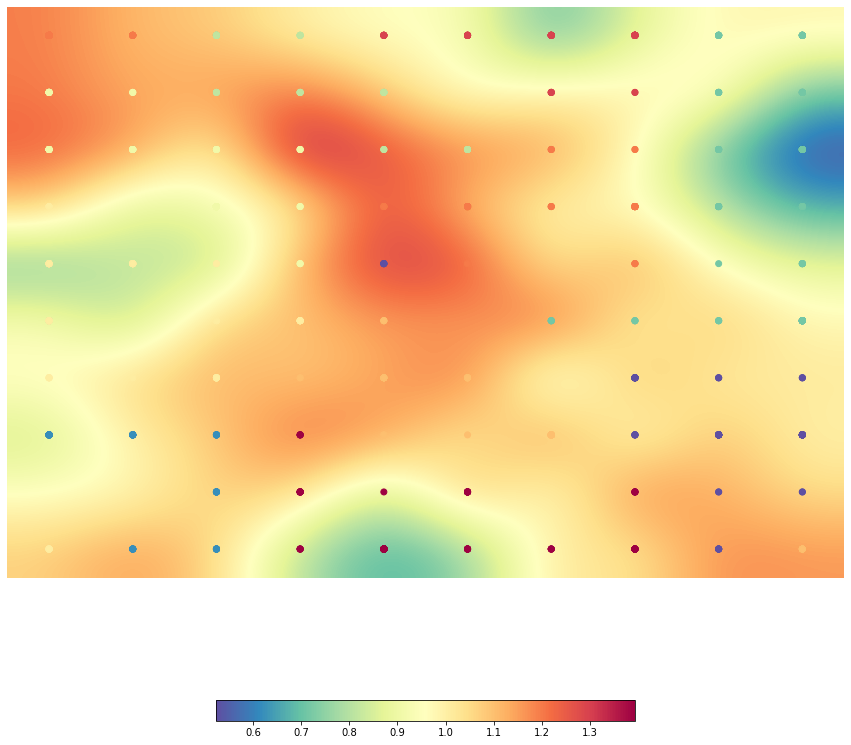

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [230]:
small_som.view_umatrix(bestmatches=True,figsize=(15, 15),colorbar=True)

In [276]:
small_som.clusters

array([[3, 3, 3, 3, 3, 3, 0, 0, 0, 0],
       [3, 3, 3, 3, 3, 3, 3, 0, 0, 0],
       [3, 3, 3, 7, 7, 3, 8, 0, 0, 0],
       [3, 3, 7, 7, 7, 8, 8, 8, 0, 0],
       [1, 1, 7, 5, 5, 8, 8, 8, 8, 8],
       [1, 1, 5, 5, 5, 9, 9, 8, 8, 8],
       [1, 1, 6, 5, 5, 9, 9, 9, 8, 4],
       [1, 6, 6, 6, 4, 4, 9, 9, 4, 4],
       [2, 6, 6, 6, 4, 4, 4, 4, 4, 4],
       [2, 2, 6, 4, 4, 4, 4, 4, 4, 4]])

In [279]:
for cluster in range(k_clusters):
  print("Cluster ",cluster,print_cluster_neurons_movies_report(cluster,small_som))

Cluster  0 Counter({'ShortFilm': 59, 'Animation': 41, 'FamilyFilm': 33, 'Comedyfilm': 27, 'Documentary': 26, 'Black-and-white': 14, 'ScienceFiction': 14, 'Silentfilm': 14, 'Comedy': 13, 'RomanceFilm': 12, 'Fantasy': 9, 'Western': 9, 'JapaneseMovies': 8, 'Action/Adventure': 8, 'Musical': 7, 'Indie': 7, 'Worldcinema': 7, 'Childrens/Family': 5, 'Anime': 4, 'Childrens': 4, 'Warfilm': 4, 'CrimeFiction': 4, 'Animatedcartoon': 3, 'Music': 3, 'Adventure': 3, 'Culture&Society': 3, 'Rockumentary': 2, 'Stopmotion': 2, 'ChildrensFantasy': 2, 'Romanticcomedy': 2, 'ChineseMovies': 2, 'Costumedrama': 2, 'Mockumentary': 2, 'Biography': 2, 'Televisionmovie': 2, 'Sports': 1, 'Fanfilm': 1, 'Action': 1, 'Language&Literature': 1, 'Dystopia': 1, 'ChildrensEntertainment': 1, 'HolidayFilm': 1, 'FantasyAdventure': 1, 'Comingofage': 1, 'Mystery': 1, 'B-Western': 1, 'Pre-Code': 1, 'Propagandafilm': 1, 'Superheromovie': 1, 'Dance': 1, 'Bollywood': 1, 'Filmnoir': 1, 'Family-OrientedAdventure': 1, 'Romanticdrama': 

##Medium Map


In [281]:
#params
n_columns = 15
n_rows = 15
k_clusters  = 20
doc_limit =2000

In [233]:
if first_run:
  medium_set = build_final_set(my_best_corpus,doc_limit=doc_limit)
  medium_som = somoclu.Somoclu(n_columns, n_rows)
  %time medium_som.train(medium_set)
  medium_som.cluster(KMeans(n_clusters=k_clusters))


  filename = 'drive/MyDrive/NEURAL/second/medium_som.pkl'
  joblib.dump(medium_som,filename)

CPU times: user 1min 15s, sys: 480 ms, total: 1min 15s
Wall time: 39.4 s


In [260]:
filename = 'drive/MyDrive/NEURAL/second/medium_som.pkl'
medium_som= joblib.load(filename)

In [235]:
sort_clusters(medium_som)


Clusters sorted by increasing number of neurons: 
Cluster index,
Number of neurons
[[14 18  0 15  8  7  9 12  6 16 13 10 19  4  3 17  5 11  1  2]
 [ 5  5  6  6  6  6  6  7 10 11 12 13 13 14 14 14 15 15 22 25]]


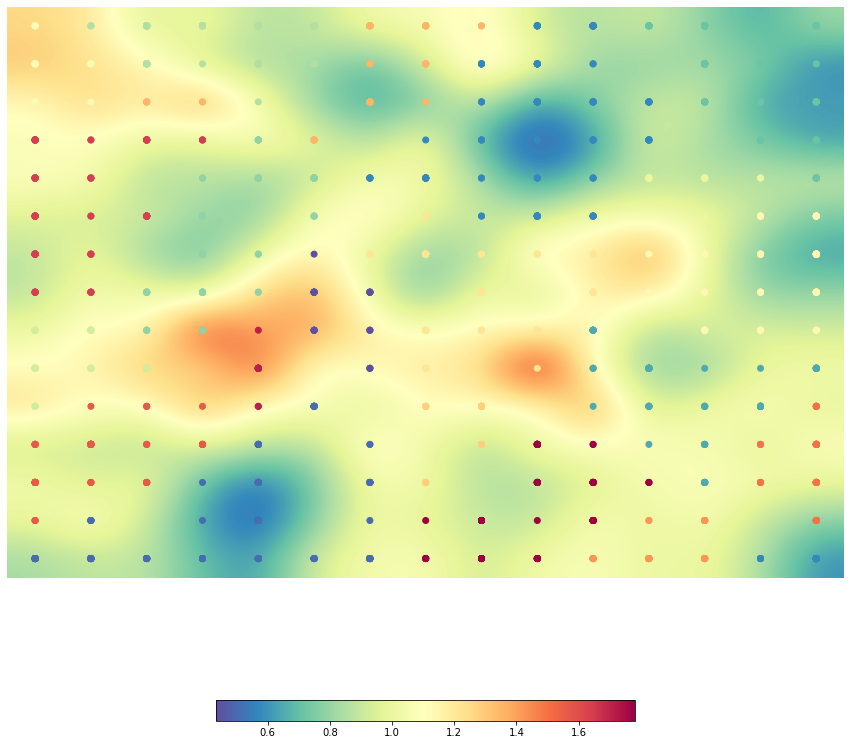

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [236]:
medium_som.view_umatrix(bestmatches=True,figsize=(15, 15),colorbar=True)

In [280]:
medium_som.clusters

array([[ 9,  6,  6,  6,  6,  6, 13, 13, 13,  2,  2,  4,  4,  4,  4],
       [ 9,  9,  6,  6,  6,  6, 13, 13,  2,  2,  2,  4,  4,  4,  4],
       [ 9,  9, 13, 13,  6, 13, 13, 13,  2,  2,  2,  2,  4,  4,  4],
       [17, 17, 17, 17,  5, 13, 13,  2,  2,  2,  2,  2,  8,  4,  4],
       [17, 17, 17,  5,  5,  5,  2,  2,  2,  2,  2,  8,  8,  8,  4],
       [17, 17, 17,  5,  5,  5,  9, 11,  2,  2,  2,  8,  8, 10, 10],
       [17, 17,  5,  5,  5,  0, 11, 11, 11, 11, 11, 10, 10, 10, 10],
       [17, 17,  5,  5,  5,  0,  0, 11, 11, 11, 11, 10, 10, 10, 10],
       [ 7,  7,  5,  5, 18,  0,  0, 11, 11, 11,  3,  3, 10, 10, 10],
       [ 7,  7,  7, 18, 18, 18,  0, 11, 12, 11,  3,  3,  3,  3,  3],
       [ 7, 16, 16, 16, 18,  1,  1, 12, 12, 12,  3,  3,  3,  3, 15],
       [16, 16, 16, 16,  1,  1,  1, 12, 12, 19, 19,  3,  3, 15, 15],
       [16, 16, 16,  1,  1,  1,  1, 12, 19, 19, 19, 19,  3, 15, 15],
       [16,  1,  1,  1,  1,  1,  1, 19, 19, 19, 19, 14, 14,  2, 15],
       [ 1,  1,  1,  1,  1,  1,  1

In [282]:
for cluster in range(k_clusters):
  print("Cluster ",cluster,print_cluster_neurons_movies_report(cluster,medium_som))

Cluster  0 Counter({'Worldcinema': 26, 'Bollywood': 20, 'Drama': 19, 'Musical': 17, 'Comedy': 7, 'Action': 4, 'Action/Adventure': 4, 'CrimeFiction': 2, 'JapaneseMovies': 2, 'Artfilm': 2, 'FamilyFilm': 2, 'Adventure': 1, 'FamilyDrama': 1, 'Politicaldrama': 1, 'Melodrama': 1, 'Epic': 1, 'MartialArtsFilm': 1, 'Thriller': 1, 'CrimeThriller': 1, 'ScienceFiction': 1, 'EroticDrama': 1, 'Surrealism': 1, 'Experimentalfilm': 1, 'RomanceFilm': 1, 'ChineseMovies': 1, 'Avant-garde': 1, 'Fantasy': 1})
Cluster  1 Counter({'Comedy': 231, 'Drama': 61, 'Indie': 54, 'Black-and-white': 35, 'ShortFilm': 32, 'Blackcomedy': 25, 'Comedy-drama': 21, 'Worldcinema': 18, 'CrimeFiction': 13, 'Silentfilm': 13, 'Parody': 12, 'Teen': 10, 'Musical': 10, 'Satire': 9, 'Fantasy': 9, 'Slapstick': 9, 'Comingofage': 8, 'Horror': 8, 'Cult': 8, 'DomesticComedy': 8, 'Buddyfilm': 8, 'Adventure': 7, 'Filmadaptation': 7, 'EnsembleFilm': 6, 'Sexcomedy': 6, 'ScienceFiction': 5, 'Sports': 5, 'Mystery': 5, 'Screwballcomedy': 5, 'Heis

##Final Map


In [326]:
#params
n_columns = 30
n_rows = 30
k_clusters  = 35

In [239]:
final_set = build_final_set(my_best_corpus)

In [240]:
final_set.shape

(5000, 5106)

In [241]:
if first_run:
  som = somoclu.Somoclu(n_columns, n_rows)
  %time som.train(final_set)
  som.cluster(KMeans(n_clusters=k_clusters))

  filename = 'drive/MyDrive/NEURAL/second/som.pkl'
  joblib.dump(som,filename)

CPU times: user 12min 45s, sys: 4.05 s, total: 12min 49s
Wall time: 6min 38s


In [242]:
filename = 'drive/MyDrive/NEURAL/second/som.pkl'
som= joblib.load(filename)

###bmus

In [349]:
bmus, indices = np.unique(som.bmus,axis=0,return_index=True)

###Sorted Clusters

In [243]:
sort_clusters(som)


Clusters sorted by increasing number of neurons: 
Cluster index,
Number of neurons
[[  3  24  23  19  18   6  14   2  29  10  32   4  30  15  13   8  31  20
    5  26  22  28  11   7  34  33   9  21  17  27  16  25   0  12   1]
 [  8   9  11  12  14  14  14  16  17  18  18  18  18  18  19  19  20  21
   22  23  24  24  24  24  25  26  31  33  35  35  37  38  43  63 109]]


###Heat Map

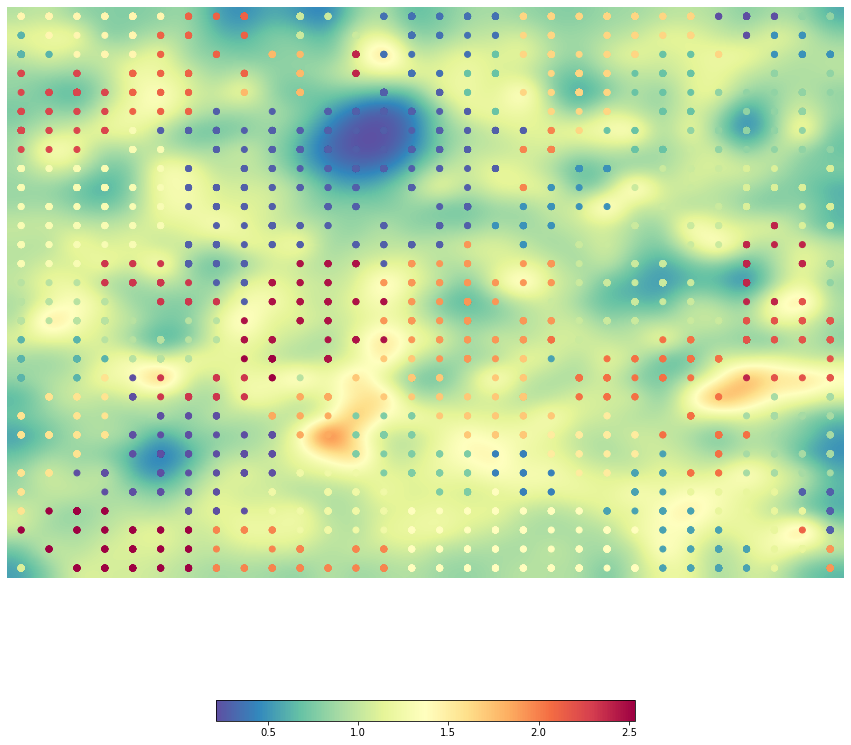

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [246]:
som.view_umatrix(bestmatches=True,figsize=(15, 15),colorbar=True)

###Cluster Categories

In [345]:
for cluster in range(k_clusters):
  print("Cluster ",cluster,print_cluster_neurons_movies_report(cluster,som))

Cluster  0 Counter({'Comedy': 302, 'Black-and-white': 46, 'Worldcinema': 34, 'Musical': 30, 'Parody': 25, 'Satire': 17, 'Slapstick': 15, 'Blackcomedy': 15, 'Screwballcomedy': 15, 'Bollywood': 15, 'Fantasy': 10, 'Comedy-drama': 10, 'Teen': 10, 'DomesticComedy': 8, 'Adventure': 7, 'Sports': 7, 'ComedyofErrors': 6, 'RomanceFilm': 6, 'CrimeFiction': 6, 'FantasyComedy': 6, 'Buddyfilm': 6, 'AdventureComedy': 6, 'Musicalcomedy': 6, 'Comedyofmanners': 6, 'ScienceFiction': 6, 'Cult': 6, 'Mystery': 5, 'Warfilm': 5, 'Sexcomedy': 5, 'Action': 5, 'Horror': 4, 'Romanticcomedy': 4, 'EnsembleFilm': 4, 'Stonerfilm': 4, 'Comedyfilm': 4, 'Mockumentary': 4, 'FilipinoMovies': 4, 'Detectivefiction': 3, 'Detective': 3, 'Whodunit': 3, 'FamilyFilm': 3, 'CrimeComedy': 3, 'Politicalsatire': 3, 'Politicalcinema': 3, 'Absurdism': 3, 'WorkplaceComedy': 3, 'ChineseMovies': 3, 'Western': 3, 'Thriller': 2, 'Pre-Code': 2, 'Roadmovie': 2, 'Comingofage': 2, 'Grossout': 2, 'Gross-outfilm': 2, 'MediaSatire': 2, 'MartialArt

###Ερμηνεία κατηγοριών clusters

In [343]:
def find_best_cluster_category(k_clusters,som):
  categories_dict ={}
  for cluster in range(k_clusters):
    category = print_cluster_neurons_movies_report(cluster,som).most_common(1)[0][0]
    if category in categories_dict:
      categories_dict[category].append(cluster)
    else :
      categories_dict[category] = [cluster]
  return categories_dict

In [344]:
find_best_cluster_category(k_clusters,som)

{'Action': [10, 14, 15],
 'Action/Adventure': [8, 17],
 'Adventure': [26],
 'Comedy': [0, 20],
 'Comedyfilm': [32],
 'CrimeFiction': [5, 24, 25],
 'Documentary': [29],
 'Drama': [1, 6, 11, 18, 23, 28, 30, 33],
 'FamilyFilm': [13, 34],
 'Horror': [21],
 'Indie': [31],
 'RomanceFilm': [12],
 'ScienceFiction': [7],
 'ShortFilm': [9],
 'Silentfilm': [4],
 'Thriller': [2, 3, 19, 22, 27],
 'Worldcinema': [16]}

####Οπτικοποίηση

In [346]:
for line in som.clusters:
  for num in line:
    if num <10:
      print("",num,end =" ")
    else:
      print(num,end=" ")
  print()

18 18 18 18 18 18 28 28 28 28 12 12 12  2  2  2  2  2 21 21 21 21 21 21 21  0  0  0  9  9 
 6 18 18 18 18 28 28 28 28 23 12 12 12  2  2  2  2  2 21 21 21 21 21 21 21 21  0  4  4  9 
 6  6 18 18 18 28 28 28 23 23 23 32 32  2  2  2  2  7 21 21 21 21 21  7  7 21  4  4  4  4 
30 30 30 18 28 28 28 28 28 23 23 32 32  1  2  2  7  7  7 21 21 21  7  7  7 21  9  9  9  9 
30 30 30 30 28 28 28 28 23 23 23 23  1  1  1  1  7  7 21 21 21 21  7  7  7  9  9  9  9  9 
30 30 30 30 28 28 28  1  1  1 23  1  1  1  1  1  1  7  7 21 21 21  7  7  7  9  9  9  9  9 
30 30 30 30 16  1  1  1  1  1  1  1  1  1  1  1  1  1  1 26 21  7  7  7  9  9  9  9  9  9 
30 30 30 16 16 16  1  1  1  1  1  1  1  1  1  1  1  1 26 26 12 12  7  7 12  9  9  9  9  9 
16 16 16 16 16 16  1  1  1  1  1  1  1  1  1  1  1  1 26 12  4  4 12 12 12 12 13 13 13 13 
16 16 16 16 16 16  1  1  1  1  1  1  1  1  1  1  1 26 26  4  4 12 12 12 12 12 13 13 13 13 
16 16 16 16 16 16  1  1  1  1  1  1  1  1  1  1  1  1  4  4  4  4 12 12 12 12 13 13 13 13 

####Σψετικά cluster

Για category Action βλέπουμε ότι τα clusters 10 & 14 είναι δίπλα, ενώ το 15 είναι σχετικά μακριά.

Παρόλα αυτά, η δεύτερη πιο συχνή κατηγορία του 15 είναι το comedy και για αυτό βρίσκεται δίπλα στο 0 και το 20.

Τα Action/Advetnure 8, 17 είναι δίπλα μεταξύ ,αλλά και κοντά στο 15, του οποίου είναι η τρίτη μεγαλύτερη κατηγορία. Κοντά του είναι και το 26, Advetnure.


Ένα μεγάλο σύνολο είναι το CrimeFiction, το οποίο είναι χωρισμένο σε 2 τοποθεσίες, στο κέντρο και κάτω δεξιά, χωρίς να έπικοινωνούν τα δύο τμήματα. Αυτό συμβαίνει λόγω των δευτερεύων χαρατκηριστικών τους, Thriller για το 5 και drama για το 25.

Τα thriller είναι σχετικά μαζεμένα κέντρο δεξιά.


Το μεγαλύτερο μας υπερ Cluster είναι το Drama το οποίο πιάνει περίπου το 1/5 του χάρτη, την πάνω αριστερά γωνία. Τα clusters 1, 6, 18, 23, 28, 30, 33, βρίσκονται δίπλα, ενώ μικρό outlier είναι το 11. Αυτό ήταν αναμενόμενο, καθώς έχει ισσοβαθμία στις κατηγορίες comedy, drama και βρίσκεται ανάμεσά τους.

####Απομακρισμένα Clusters

Μακριά εννοιολογικά καθώς και στον χάρτη μας είναι το comedy, thriller, τα οποία έχουν το πολύ μεγάλο cluster drama μεταξύ τους. Αυτό είναι λογικό καθώς το comedy μπορεί να συνυπάρχει με το drama, όπως φυσικά και το thriller.

####Άσχετα clusters

Το cluster 9 δεν έχει κάποια συνοχή, καθώς το κύριο χαρακτηριστικό του είναι το short film, το οποίο προφανώς δεν καθορίζε τον τύπο ταινίας και για αυτό, πέρα από το ότι οι υπόλοιπες κατηγορίες είναι άσχετες μεταξύ τους, είναι και χωρισμένο σε τμήματα.

####Τελικό συμπέρασμα

Παρατηρίσαμε ότι το dataset μας έχει πάρα πολλές ταινίες drama, το οποίο μπορεί να αιτιολογεί το γεγονός ότι στον content recomender σε μερικές ταινίες είχαμε πάρα πολύ καλά αποτελέσματα, ενώ σε άλλες πάρα πολύ κακά. Το dataset είναι unbalanced